# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [113]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/feliciastevany/DataMiningW2/refs/heads/main/penguins_size.csv') # Read the csv dataset
df.sample(10) # Showing 10 random sample rows of the dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
134,Adelie,Dream,38.1,17.6,187.0,3425.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
302,Gentoo,Biscoe,47.4,14.6,212.0,4725.0,FEMALE
67,Adelie,Biscoe,41.1,19.1,188.0,4100.0,MALE
242,Gentoo,Biscoe,46.5,14.5,213.0,4400.0,FEMALE
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,FEMALE
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,FEMALE
193,Chinstrap,Dream,46.2,17.5,187.0,3650.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [114]:
#2
df.info() # Showing the info of all the column including datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [115]:
#3
description = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
description # showing the description of the column

# The table displays statistical summaries of four attributes: culmen length, culmen depth, flipper length, and body mass for 342 samples.
# As shown, all the columns have the same count that is 342.
# From the data, the feature with the highest range is body mass, with a range from 2,700 g to 6,300 g.
# On the other hand, the feature with the lowest range is culmen depth, which ranges from 13.1 mm to 21.5 mm.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [116]:
#4
# Showing the number of unique value on each column
species_counts = df['species'].value_counts(dropna=False)
print(species_counts)

island_counts = df['island'].value_counts(dropna=False)
print(island_counts)

sex_counts = df['sex'].value_counts(dropna=False)
print(sex_counts)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [117]:
#5
# filling all the missing values
df.fillna({ 'culmen_length_mm': df['culmen_length_mm'].mean(),
    'culmen_depth_mm': df['culmen_depth_mm'].mean(),
    'flipper_length_mm': df['flipper_length_mm'].mean(),
    'body_mass_g': df['body_mass_g'].mean(),
    'sex': df['sex'].mode()[0] }, inplace=True)

df['sex'] = df['sex'].replace('.', df['sex'].mode()[0])

missing = df.isnull().sum() # check if there is still a null values
missing # showing the number of missing value

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

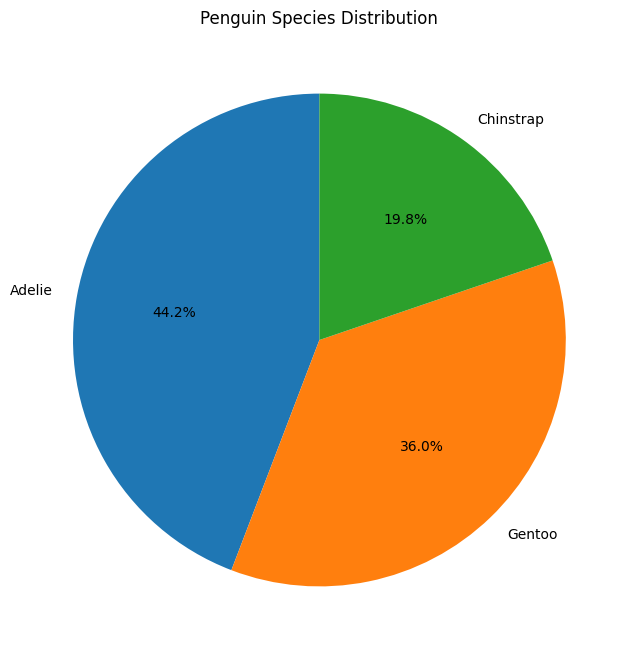

In [118]:
#6
# Count the number of each species
species_count = df['species'].value_counts()

# Pie chart to show the distribution of penguin species
plt.figure(figsize=(8, 8))
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Penguin Species Distribution')
plt.show()

7. Check unique value of our target variable

In [119]:
#7
unique_values = df['species'].unique() # Checking unique values in species column
print(unique_values) # Showing unique values in species column

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [120]:
#8
encoder = LabelEncoder() # create a LabelEncoder to encode the categorical columns

# apply lable encoding to specific categorical columns (island and sex)
df['island'] = encoder.fit_transform(df['island'])
df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
    'body_mass_g']] = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].round(1) # round the value to 1 point decimal
df['sex'] = encoder.fit_transform(df['sex']) + 1

df.head() # showing the first 5 encoded columns

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
3,Adelie,2,43.9,17.2,200.9,4201.8,2
4,Adelie,2,36.7,19.3,193.0,3450.0,1


9. encode the target column and display the results

In [121]:
#9
# apply label encoding to the target column (species)
df['species'] = encoder.fit_transform(df['species'])

df.sample(5) # showing the random encoded columns

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
236,2,0,42.0,13.5,210.0,4150.0,1
306,2,0,43.4,14.4,218.0,4600.0,1
182,1,1,40.9,16.6,187.0,3200.0,1
291,2,0,46.4,15.6,221.0,5000.0,2
158,1,1,46.1,18.2,178.0,3250.0,1


10. create a heatmap to see the correlation and explain the conclusion

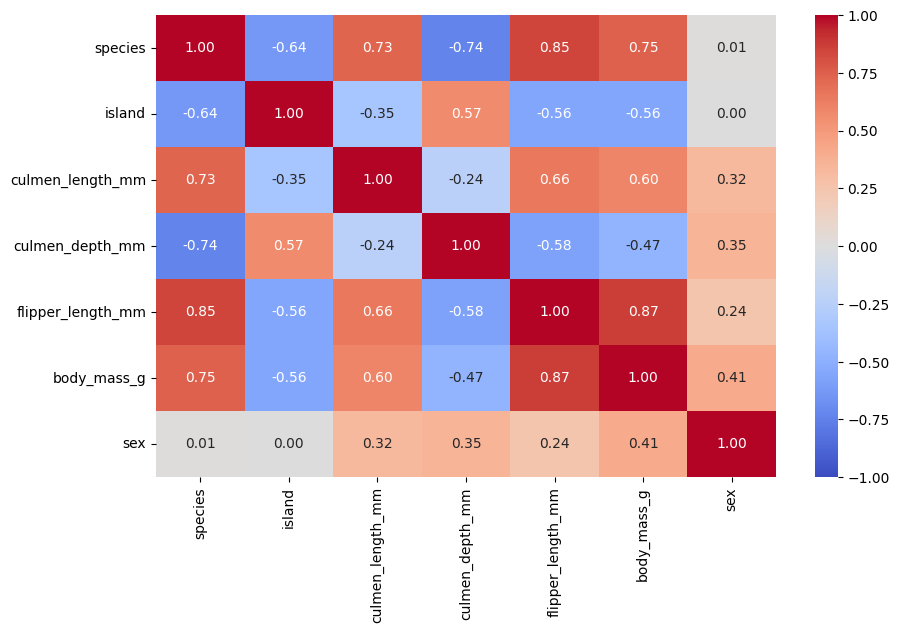

In [122]:
#10
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('')

plt.show() #Showing the heatmap result

# Conclusion
# The heatmap illustrates the correlation matrix for various features in the dataset, highlighting the strength of linear relationships between them.
# There are strong positive correlations between variables such as species and flipper length (0.85) and species and body mass (0.75),
# indicating that larger species have longer flippers and higher body mass. On the other hand, strong negative correlations are observed between species and culmen depth
# (-0.74) as well as species and island (-0.64), suggesting that certain species have lower culmen depth and are distributed differently across islands.

## Machine Learning

1. Splitting X and y

In [123]:
#1
# X is the predicting variable, and y is the predicted variable (target)
X = df.drop(['species'], axis = 1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [124]:
#2
# Splitting the data to traning and test using train test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [125]:
#3
# Checking how many rows and columns in each train and test data
X_train.shape, X_test.shape

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [126]:
#Criterion Entropy
#a
# Modelling using criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [127]:
#b
# Predict X-test with creation entropy model
y_pred_entropy = clf_entropy.predict(X_test)

In [128]:
#c
# Accuracy score using y_test and y_pred
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_entropy)) # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion entropy: 0.9275


In [129]:
#d
y_train_entropy = clf_entropy.predict(X_train)

# Accuracy for test and train using creation entropy model
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
training_accuracy_entropy = accuracy_score(y_train, y_train_entropy)

# Showing testing and training accuracy based on train and test data
print('Testing accuracy: {0:0.4f}'.format(test_accuracy_entropy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy_entropy))

Testing accuracy: 0.9275
Training accuracy: 0.9709


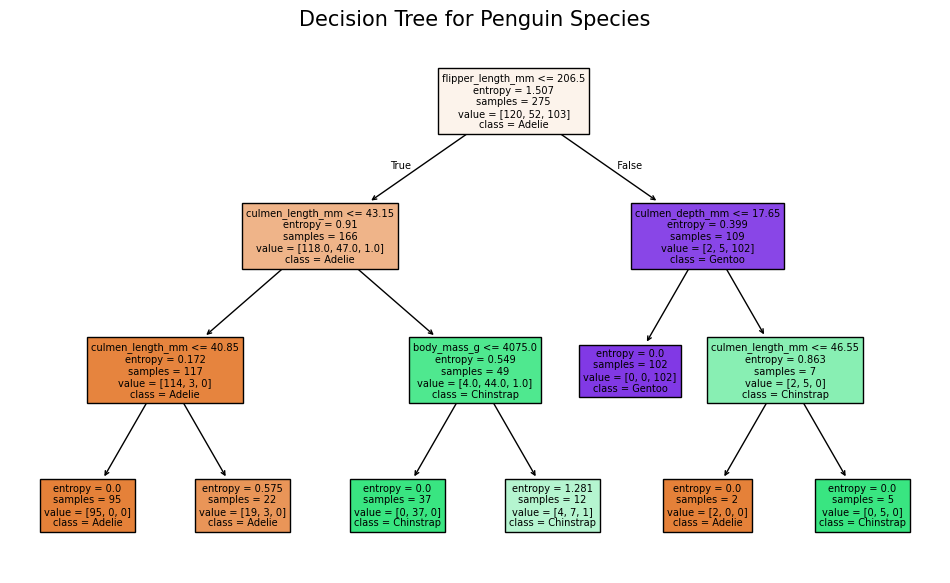

In [130]:
#e
from sklearn import tree

# Plot the tree using the criterion entropy model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title("Decision Tree for Penguin Species", fontsize=15)
plt.show()

2. Criterion Gini index

In [131]:
#a
# Modelling using criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [132]:
#b
# Predict X-test with criterion gini model
y_pred_gini = clf_gini.predict(X_test)

In [133]:
#c
# Accuracy score using y_test and y_pred
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_gini)) # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion gini: 0.9275


In [134]:
#d
y_train_gini = clf_gini.predict(X_train)

# Accuracy for test and train using criterion gini model
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)
training_accuracy_gini = accuracy_score(y_train, y_train_gini)

# Showing testing and training accuracy based on train and test data
print('Testing accuracy: {0:0.4f}'.format(test_accuracy_gini))
print('Training accuracy: {0:0.4f}'.format(training_accuracy_gini))

Testing accuracy: 0.9275
Training accuracy: 0.9709


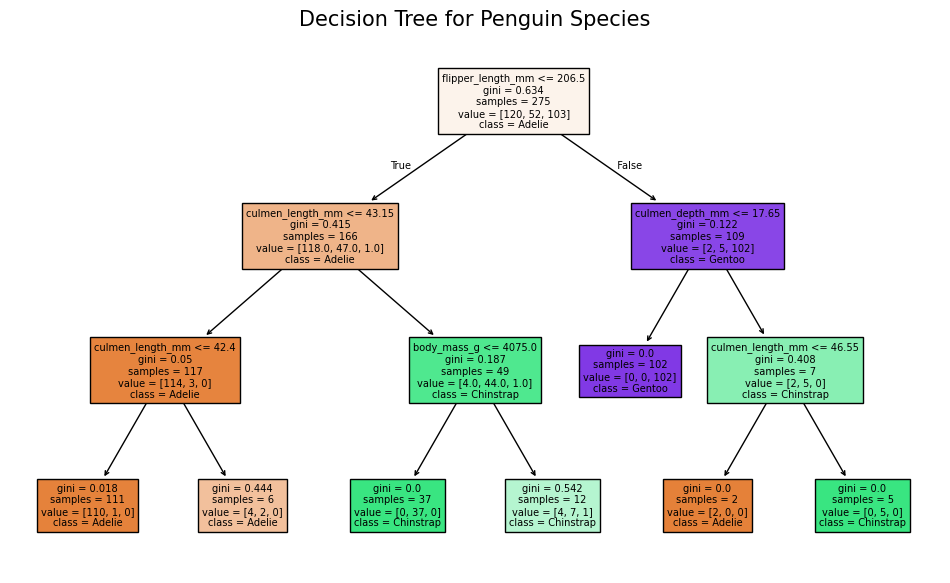

In [135]:
#e
# Plot the tree for the criterion gini model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title("Decision Tree for Penguin Species", fontsize=15)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [136]:
#f
# Confusion matrix of criterion entropy and criterion gini model
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix (Entropy):\n", cm_entropy)
print("Confusion Matrix (Gini):\n", cm_gini)

Confusion Matrix (Entropy):
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]
Confusion Matrix (Gini):
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [137]:
#g
# Classification report of criterion entropy and criterion gini model
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [138]:
#h
# Result
# Based on the classification report for both Criterion Entropy and Gini models, they show very similar results in terms of accuracy, precision, recall, and F1-score.
# Both the models showing the same accuracy for training (0.9275) and testing data (0.9709).
# It shows that both models achieved an identical accuracy of 0.93 or 93%, indicating that both algorithms perform well in predicting the given classes.

# Conclusion
# Since the training accuracy (0.9709) is higher than the testing accuracy (0.9275), the model might be slightly overfitting.
# However, the difference isn't big, so the model is still fairly stable.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [139]:
#a
nb_model = GaussianNB()

nb_model.fit(X_train, y_train) # Modelling using Naive Bayes

GaussianNB()

In [140]:
#b
# Predicting the test set results using Naive Bayes
y_pred = nb_model.predict(X_test)

In [141]:
#c
# Showing accuracy score using y_test and y_pred
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
# Showing confusion matrix of Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_nb)

Model accuracy score: 0.9710
Confusion Matrix:
 [[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [142]:
#e
# Showing the classification report based on y test and y pred
clf_report_nb = classification_report(y_test, y_pred)

print("Classification Report:\n", clf_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [143]:
#f
# Result
# The Naive Bayes model achieved an accuracy score of 0.9710, showing that it correctly classified about 97.1% of the data.
# The confusion matrix showed that most classes were accurately predicted, with only a few misclassifications. Specifically, Class 0 had 31 true positives but 1
# false positive, while Class 1 had 15 true positives with 1 misclassified as Class 0. Class 2 performed perfectly, with all 21 instances correctly classified.
# The classification report showed strong precision, recall, and F1-scores for all classes, especially for Class 2, which had perfect scores.

# Conclusion
# The Naive Bayes model shows strong prediction skills with an accuracy score of 0.9710.
# The confusion matrix and classification report show that it effectively classifies the data, making it a good option for this classification.

Good Luck :)